## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
# Load the Boston housing dataset
data = datasets.load_boston()

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [3]:
# Convert it into a pandas DataFrame
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
# Select the 'TAX' feature as our predictor and 'target' as our response variable
X = df[['TAX']] 
y = df[['target']]
# Fit a linear regression model
lnr = LinearRegression().fit(X,y)
lnr.coef_, lnr.intercept_   

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


(array([[-0.0255681]]), array([32.97065449]))

Text(0.5, 1.0, 'f: [-0.0255681] * x + [32.97065449]')

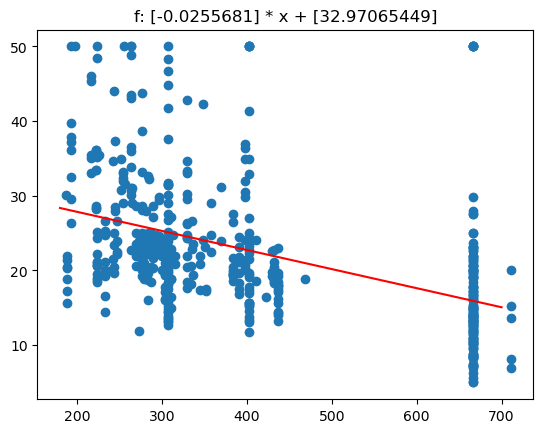

In [5]:
# Compute the equation of the fitted line
f = lambda x: lnr.coef_[0] * x + lnr.intercept_
# Generate the line using the equation
steps = list(np.arange(180,720,20))
fitline = list(map(f, steps))
# Plot the fitted line (red) and the data points
pyplot.plot(steps, fitline, color='red')
pyplot.scatter(x=df.TAX,y=df.target)
pyplot.title(f"f: {lnr.coef_[0]} * x + {lnr.intercept_}")

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [6]:
X=df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=df[['target']]

In [7]:
# Fit a linear regression model
lnr = LinearRegression().fit(X,y)
lnr.coef_, lnr.intercept_  

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


(array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
          2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
          6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
         -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
         -5.24758378e-01]]),
 array([36.45948839]))

In [8]:
# Evaluate the model using R-squared
lnr.score(X,y)

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


0.7406426641094095

In [9]:
# Predict the response variable using the model
y_pred = lnr.predict(X)

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [10]:
# Compute the mean squared error manually
MSE = np.square(np.subtract(y, y_pred)).mean()
print(MSE)

target    21.894831
dtype: float64


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (303, 13)
y_train shape: (303, 1)
X_test shape: (203, 13)
y_test shape: (203, 1)


In [13]:
# Fit the model on the training data
lnr = LinearRegression().fit(X_test,y_test)
lnr.coef_, lnr.intercept_ 

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


(array([[-7.51291200e-02,  2.47529123e-02, -5.19279595e-02,
          3.97376739e+00, -1.45281020e+01,  4.76892350e+00,
          5.90201305e-03, -1.25283202e+00,  3.66550100e-01,
         -1.25612286e-02, -6.36842960e-01,  1.68418368e-02,
         -5.01429761e-01]]),
 array([19.10646197]))

In [14]:
# Evaluate the model on the testing data
lnr.score(X_test,y_test)

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


0.721823138940902

In [15]:
# Predict the response variable on the testing data
test_pred = lnr.predict(X_test)
# Compute the mean squared error on the testing data
MSE = np.square(np.subtract(y_test,test_pred)).mean()
print(MSE)

target    23.013724
dtype: float64


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
